In [ ]:
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from utils.scatter_plot import scatter_plot


In [2]:
path_hma_gtng = 'data/extents/HMA/gtng_202307_hma_subregions.gpkg'
path_hma_reservoirs = 'data/reservoirs/GDW_reservoirs_v1_0_hma.gpkg'


In [3]:
### read in data
hma_gtng = gpd.read_file(path_hma_gtng)
hma_reservoirs = gpd.read_file(path_hma_reservoirs)
print(hma_reservoirs.shape)
hma_reservoirs.head(2)


(485, 72)


,GDW_ID,RES_NAME,DAM_NAME,ALT_NAME,DAM_TYPE,LAKE_CTRL,RIVER,ALT_RIVER,MAIN_BASIN,SUB_BASIN,...,LONG_DAM,LAT_DAM,ORIG_SRC,POLY_SRC,GRAND_ID,HYRIV_ID,INSTREAM,HYLAK_ID,HYBAS_L12,geometry
0,287,Toktogul'skoye,Toktogul,None,Dam,None,Naryn,None,None,None,...,0.0,0.0,GRanD,SWBD,4675,40300163,Instream,1306,4120395430,"MULTIPOLYGON (((72.89472 41.84669, 72.89417 41..."
1,292,Kayrakkumskoye,Kayrakkum,Kairakkum,Dam,None,Syr-Daria,None,None,None,...,0.0,0.0,GRanD,SWBD,4686,40343454,Instream,1320,4120446290,"MULTIPOLYGON (((70.22608 40.42086, 70.22856 40..."


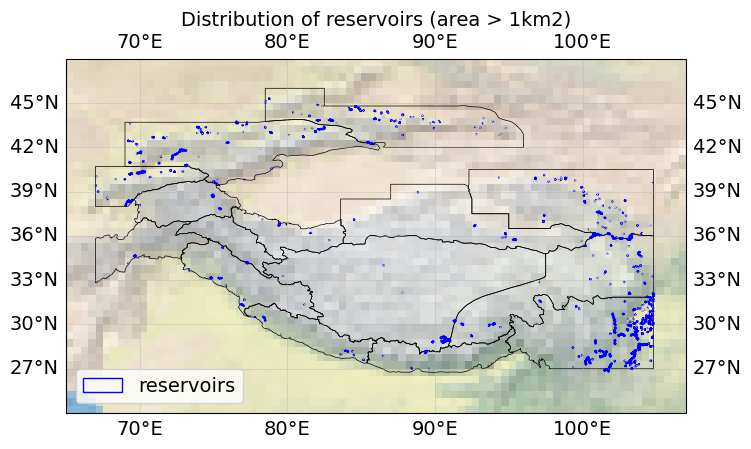

In [ ]:
## Reservoirs
plt.rcParams.update({'font.size':14})
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
hma_gtng.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.5)
hma_reservoirs.plot(ax=ax, edgecolor='blue', linewidth=1.5)
ax.stock_img()
legend_patches = [
  mpatches.Patch(edgecolor='blue', facecolor='none', label='reservoirs')]
ax.legend(handles=legend_patches, loc='lower left')
ax.set_title('Distribution of reservoirs (area > 1km2)', fontsize=14)
# plt.savefig('figures/hma_reservoirs.png', bbox_inches='tight', dpi=100)



In [5]:
### statistic of the lakes area in each basin.
hma_gtng['area_reservoirs'] = np.nan
hma_gtng['num_reservoirs'] = np.nan
for i in range(hma_gtng.shape[0]):
    basin = hma_gtng['geometry'][i]
    ids = np.where(basin.contains(hma_reservoirs['geometry'].centroid))[0]
    area_basin = hma_reservoirs.loc[ids, 'AREA_POLY'].sum()   # Sum the area of lakes
    hma_gtng.loc[i, 'area_reservoirs'] = area_basin    # Area of lakes
    hma_gtng.loc[i, 'num_reservoirs'] = len(ids)       # Number of lakes


Text(0.5, 1.0, 'Reservoirs in hma regions')

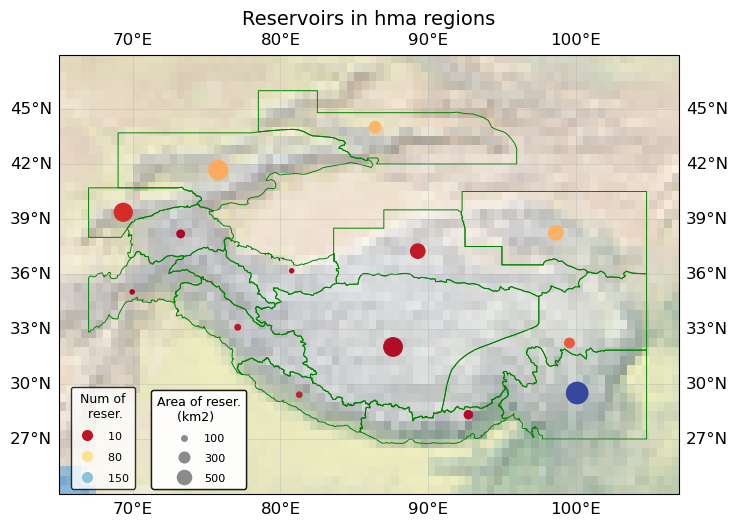

In [ ]:
region_centers = hma_gtng.geometry.representative_point()
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
ax.stock_img()
hma_gtng.plot(ax = ax, facecolor='None', edgecolor='green', lw=0.7)
plt.rcParams.update({'font.size': 9})
scatter_plot(region_centers.x.values, region_centers.y.values, 
                          size=hma_gtng['area_reservoirs'].values,  
                          color=hma_gtng['num_reservoirs'].values, ax=ax, 
                          title_legend_color='Num of\n  reser.', 
                          title_legend_size='Area of reser.\n     (km2)',                          
                          labels_size = [100, 300, 500], labels_color = [10, 80, 150], 
                          scale_size = 1/4, color_range=[0, 200], cmap="RdYlBu")
ax.set_title('Reservoirs in hma regions', fontsize=14)
